Looking into this issue https://github.com/home-assistant/home-assistant/issues/31610

See the PIL docs for open:

 PIL.Image.open(fp, mode='r')

    Opens and identifies the given image file.

    This is a lazy operation; this function identifies the file, but the file remains open and the actual image data is not read from the file until you try to process the data (or call the load() method). See new().
    Parameters:	

        fp – A filename (string), pathlib.Path object or a file object. The file object must implement read(), seek(), and tell() methods, and be opened in binary mode.
        mode – The mode. If given, this argument must be “r”.

    Returns:	

    An Image object.
    Raises:	

    IOError – If the file cannot be found, or the image cannot be opened and identified.

In [1]:
import io
from pathlib import Path
from typing import Union
from PIL import Image, ImageDraw, UnidentifiedImageError

In [2]:
test_bytes = b"test"
type(test_bytes)

bytes

In [3]:
type(io.BytesIO(bytearray(test_bytes)))

_io.BytesIO

`io.BytesIO` is an 'In-memory binary stream'

In [4]:
try:
    img = Image.open(io.BytesIO(bytearray(b"test"))).convert("RGB")
except UnidentifiedImageError:
    pass
    #print('No image data')

We can also pass to open a str:

In [5]:
img = Image.open("cat.jpg")
type(img)

PIL.JpegImagePlugin.JpegImageFile

or a path

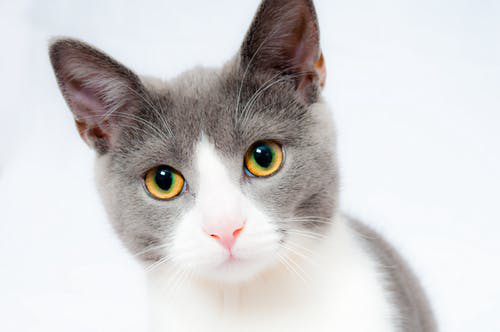

In [6]:
img = Image.open(Path("cat.jpg"))
img

Lets wrap this in a helper

In [13]:
def convert_to_pil_image(fp : Union[str, Path, io.BytesIO]) -> Union[Image.Image, None]:
    """Converts a valid input to a PIL Image, else returns None."""
    try:
        return Image.open(fp).convert("RGB")
    except UnidentifiedImageError:
        return None

In [14]:
img = convert_to_pil_image("cat.jpg")
type(img)

PIL.Image.Image

In [15]:
img = convert_to_pil_image(Path("cat.jpg"))
type(img)

PIL.Image.Image

In [16]:
img = convert_to_pil_image(io.BytesIO(bytearray(b"test")))
type(img)

NoneType

In [12]:
if not img:
    print('invalid')

invalid
